Architecture :
---
inp_image->CNN Based Feature Extraction-> flatten-> regressor-> sigmoid -> output[x,y,height,width]

Steps:
1. Synthetic usecase : Detect white blobs on black background
2. semi-synthetic usecase : detect cats on black background
3. Final usecase : cat on nm-bg

In [3]:
import tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAvgPool2D,Dense,Flatten
from tensorflow.keras.models import Model


In [ ]:
# vgg=VGG16(input_shape=[128,128,3],include_top=False)
# x=Flatten()(vgg.output)
# x=Dense(3,activation='sigmoid')(x)

# model=Model(vgg.input,x)

Using GlobalAvgPooling Cuz of less data and overfitting

In [5]:
vgg=VGG16(input_shape=[128,128,3],include_top=False)
x=GlobalAvgPool2D()(vgg.output)
x=Dense(3,activation='sigmoid')(x)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
from tensorflow.keras.optimizers import Adam

In [9]:
model1=Model(vgg.input,x)
model1.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.001))


In [11]:
from tensorflow.keras.utils import plot_model

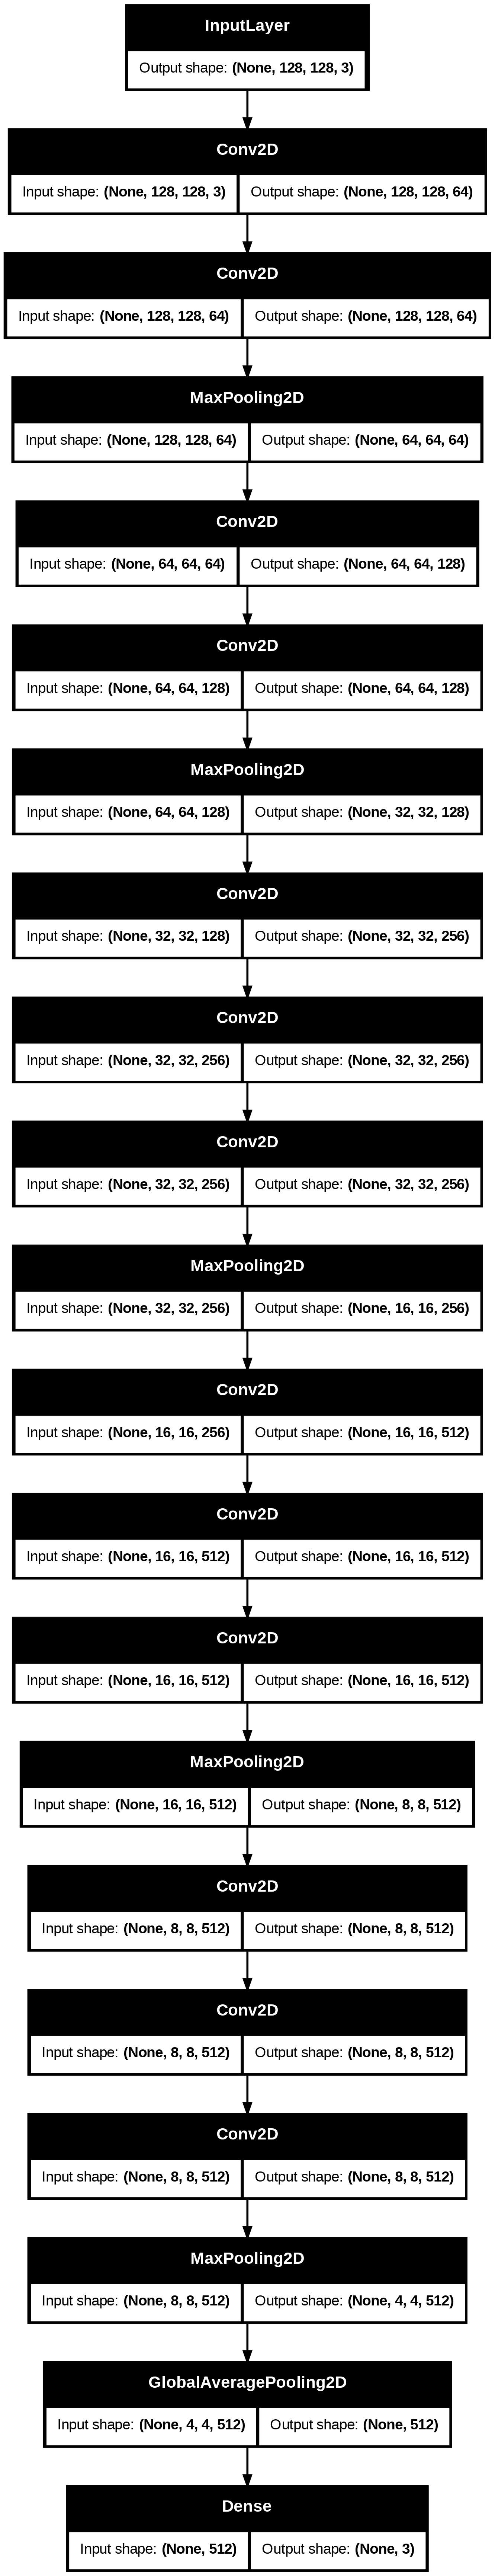

In [12]:
plot_model(model1,"first_model.png",show_shapes=True,expand_nested=False)

# STEP1

data for blobs

In [13]:
BATCH_SIZE=64

In [39]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle,Rectangle

In [32]:
import numpy as np

In [43]:
def blob_data(batch_size=BATCH_SIZE):
  while True:
    #all black
    X=np.zeros((batch_size,128,128,3))
    Y=np.zeros((batch_size,3))
    for i in range(batch_size):
    #filling image
      x=np.random.randint(8,120) # x under the image size : 128x128
      y=np.random.randint(8,120) # same stuff for y
      # T_T these are my comments for rememberance ,not of ai
      max_radius=min(128-max(x,y),min(x,y))
      radius=np.random.randint(4,max_radius)

      # time to draw circle inside the provided param
      for x_i in range(128):
        for y_i in range(128):
          if((x_i-x)**2 +((y_i - y)**2)<radius**2): # condition for circle : so pixel lies inside circle
            X[i,x_i,y_i,:]=1 # if inside circle : color it
      Y[i,0]=(x-radius)/128.# left edge
      Y[i,1]=(y-radius)/128.# top edge
      Y[i,2]=2*radius/128# radius of box
    yield X,Y


In [49]:
model1.fit(blob_data(),steps_per_epoch=64,epochs=5)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 65s 375ms/step - loss: 1.6648
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - loss: 0.5081
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - loss: 0.4917
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 374ms/step - loss: 0.4916
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - loss: 0.4893


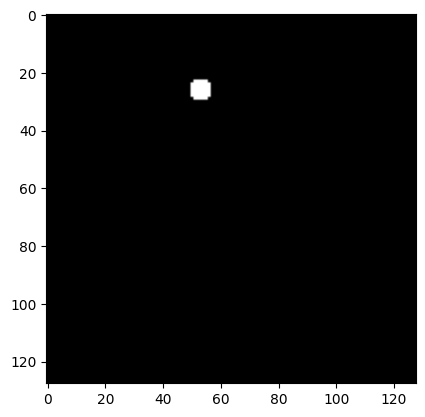

In [44]:
x,y=next(blob_data())
plt.imshow(x[0])

# EXAMPLER


In [36]:
# X=np.zeros((BATCH_SIZE,128,128,3))
# Y=np.zeros((BATCH_SIZE,3))

In [37]:
# len(X)
# X[0]

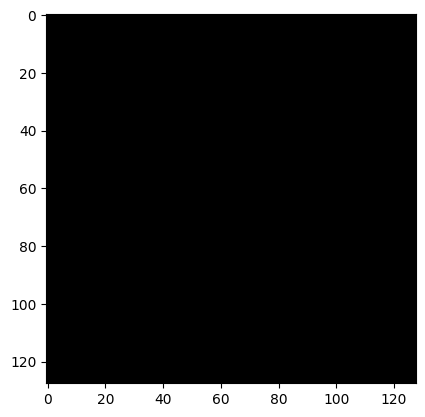

In [38]:
plt.imshow(X[0])

# CONTINUATION

In [55]:
def plot_pred(img,params):
  fig,ax=plt.subplots(1)
  ax.imshow(img)
  rect = Rectangle(xy=(params[1]*128,# bottom-left corner of box(x,y)
                       params[0]*128)
                       ,width=params[2]*128,
                   height=params[2]*128,
                   linewidth=1,
                   edgecolor='g',
                   facecolor='none')
  ax.add_patch(rect)
  plt.show()

In [56]:
x,_=next(blob_data())


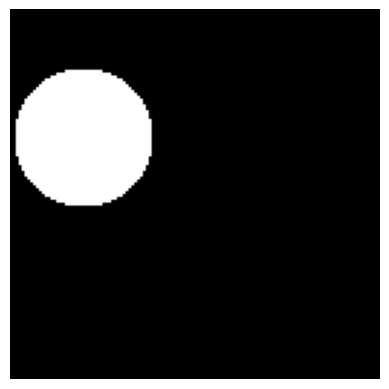

In [57]:


plt.imshow(x[0])
plt.axis("off")
plt.show()


In [58]:
pred=model1.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [59]:
print(pred[0])


[0.14058706 0.01334931 0.36557096]


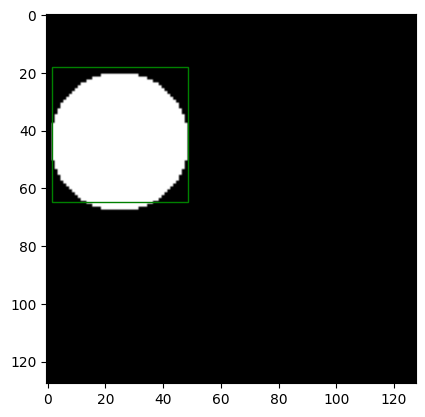

In [60]:
plot_pred(x[0],pred[0])

